In [1]:
import os
import evoVAE.utils.seq_tools as st
import evoVAE.utils.statistics as stats 
import numpy as np
import pandas as pd
print(os.getcwd())


/Users/sebs_mac/git_repos/evoVAE/notebooks


In [2]:
aln: pd.DataFrame = pd.read_pickle("/Users/sebs_mac/uni_OneDrive/honours/data/gb1/encoded_weighted/gb1_ancestors_extants_encoded_weighted_no_dupes.pkl")
aln = aln.drop_duplicates(subset=['sequence'])
#aln = aln.sample(frac=0.2)
aln.drop(columns=["encoding", "weights"], inplace=True)
aln.to_csv("/Users/sebs_mac/uni_OneDrive/honours/data/gb1/encoded_weighted/gb1_ancestors_extants_no_dupes.pkl")

,id,sequence
0,N0_gb1_tree_1,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...
1,N1_gb1_tree_1,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...
3,N3_gb1_tree_1,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...
6,N6_gb1_tree_1,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...
7,N7_gb1_tree_1,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTTVAADSAIEDTPIIRN...


In [2]:
DATA_PATH = "/Users/sebs_mac/git_repos/dms_data/DMS_msa_files/"
msa_files = os.listdir(DATA_PATH)
metadata = "/Users/sebs_mac/git_repos/dms_data/DMS_substitutions.csv"

In [3]:
meta = pd.read_csv(metadata)
meta.head()

,DMS_id,DMS_filename,UniProt_ID,taxon,source_organism,target_seq,seq_len,includes_multiple_mutants,DMS_total_number_mutants,DMS_number_single_mutants,...,MSA_num_significant_L,raw_DMS_filename,raw_DMS_phenotype_name,raw_DMS_directionality,raw_DMS_mutant_column,weight_file_name,pdb_file,ProteinGym_version,raw_mut_offset,coarse_selection_type
0,A0A140D2T1_ZIKV_Sourisseau_2019,A0A140D2T1_ZIKV_Sourisseau_2019.csv,A0A140D2T1_ZIKV,Virus,Zika virus,MKNPKKKSGGFRIVNMLKRGVARVNPLGGLKRLPAGLLLGHGPIRM...,3423,False,9576,9576,...,0.661972,A0A140D2T1_ZIKV_Sourisseau_growth_2019.csv,effect,1,mutant,A0A140D2T1_ZIKV_theta_0.01.npy,A0A140D2T1_ZIKV.pdb,0.1,NaN,OrganismalFitness
1,A0A192B1T2_9HIV1_Haddox_2018,A0A192B1T2_9HIV1_Haddox_2018.csv,A0A192B1T2_9HIV1,Virus,HIV,MRVKGIQMNSQHLLRWGIMILGMIMICSVAGNLWVTVYYGVPVWKD...,852,False,12577,12577,...,2.835714,A0A192B1T2_9HIV1_Haddox_2018.csv,fitness,1,mutant,A0A192B1T2_9HIV1_theta_0.01.npy,A0A192B1T2_9HIV1.pdb,0.1,NaN,OrganismalFitness
2,A0A1I9GEU1_NEIME_Kennouche_2019,A0A1I9GEU1_NEIME_Kennouche_2019.csv,A0A1I9GEU1_NEIME,Prokaryote,Neisseria meningitidis,FTLIELMIVIAIVGILAAVALPAYQDYTARAQVSEAILLAEGQKSA...,161,False,922,922,...,0.521739,A0A1I9GEU1_NEIME_Kennouche_2019.csv,piliation_log2_ratio,1,mutants,A0A1I9GEU1_NEIME_theta_0.2.npy,A0A1I9GEU1_NEIME.pdb,0.1,NaN,Activity
3,A0A247D711_LISMN_Stadelmann_2021,A0A247D711_LISMN_Stadelmann_2021.csv,A0A247D711_LISMN,Eukaryote,Listeria monocytogenes,MNINDLIREIKNKDYTVKLSGTDSNSITQLIIRVNNDGNEYVISES...,87,False,1653,1653,...,2.402299,A0A247D711_LISMN_Stadelmann_2021.csv,mean_prediction,1,mutant,A0A247D711_LISMN_b03_theta_0.2.npy,A0A247D711_LISMN.pdb,1.0,NaN,Activity
4,A0A2Z5U3Z0_9INFA_Doud_2016,A0A2Z5U3Z0_9INFA_Doud_2016.csv,A0A2Z5U3Z0_9INFA,Virus,influenza H1N1,MKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHS...,565,False,10715,10715,...,1.691042,A0A2Z5U3Z0_9INFA_Doud_2016.csv,transformed_pref,1,mutant,A0A2Z5U3Z0_9INFA_theta_0.01.npy,A0A2Z5U3Z0_9INFA.pdb,0.1,NaN,OrganismalFitness


In [15]:
msa_files[0]

'SPA_STAAU_2023-08-07_b04.a2m'

In [4]:
avg_entropies = []
for msa in meta['MSA_filename']:
    aln = st.read_aln_file(DATA_PATH + msa, encode=False)
    h = stats.calc_shannon_entropy(aln)
    avg_entropies.append(np.mean(h))    


meta['entropy'] = avg_entropies

Reading the alignment: /Users/sebs_mac/git_repos/dms_data/DMS_msa_files/A0A140D2T1_ZIKV_theta0.99_281-804_11-26-2021_b02.a2m
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Removed 681 sequences
Number of seqs: 15820
Sequence weight numpy array created with shape (num_seqs, columns):  (15820, 524)
Reading the alignment: /Users/sebs_mac/git_repos/dms_data/DMS_msa_files/A0A192B1T2_9HIV1_theta0.99_full_11-26-2021_b09.a2m
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Removed 3708 sequences
Number of seqs: 71146
Sequence weight numpy array created with shape (num_seqs, columns):  (71146, 852)
Reading the alignment: /Users/sebs_mac/git_repos/dms_data/DMS_msa_files/A0A1I9GEU1_NEIME_full_11-26-2021_b08.a2m
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Removed 12 sequences
Number of seqs: 5541
Sequence weight numpy array created with shape (num_seqs, columns):  (5541, 161)
Reading the alignment: /Users/sebs_mac/git_repos/dms_data/DMS_msa_files/A0A247D711_LISMN_full_b0.3

In [11]:
np.mean(h)

0.9027762038705996

In [8]:
meta.to_csv("DMS_substitutions.csv")

In [116]:
updated = pd.read_csv("../data/DMS_substitutions.csv")
updated[updated["DMS_id"].str.contains("GFP")]["DMS_number_multiple_mutants"]

67    50630
Name: DMS_number_multiple_mutants, dtype: int64

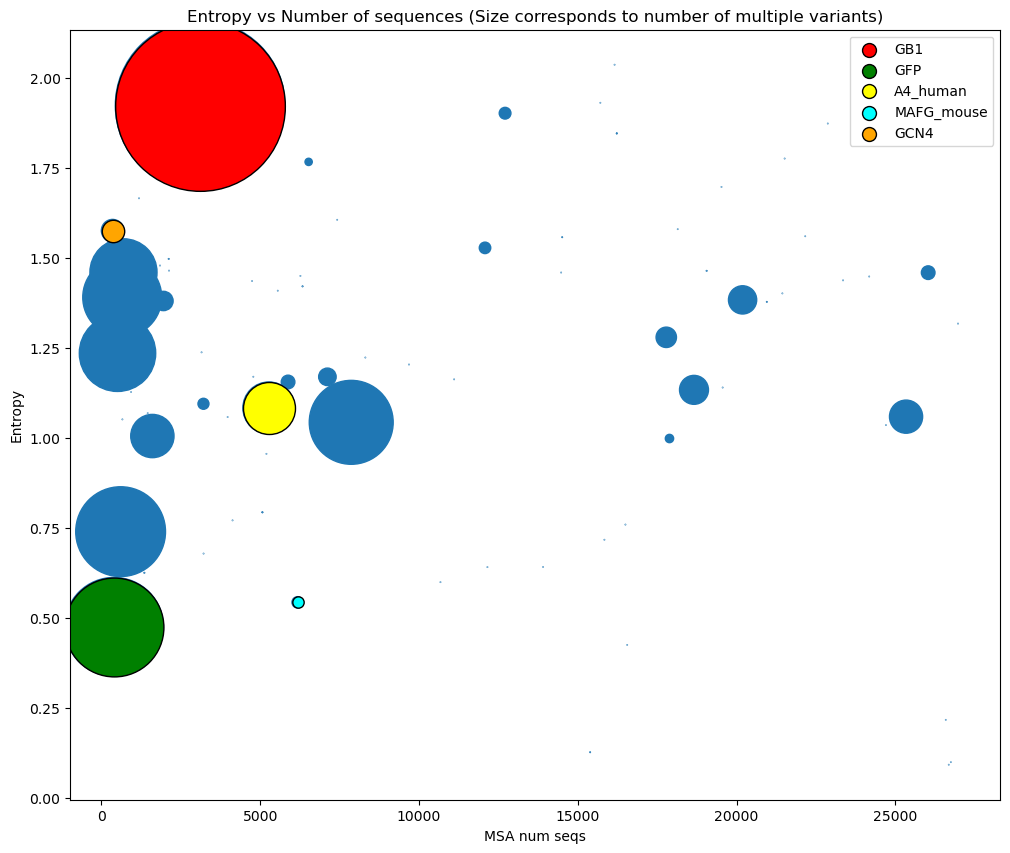

In [122]:
import matplotlib.pyplot as plt


small_msas = updated[(updated["MSA_num_seqs"] < 30000) & (updated["MSA_num_seqs"] >= 350)]
sizes = (small_msas["DMS_number_multiple_mutants"] + 1) * 0.1  # Adjust the multiplier as needed for better visualization

fig = plt.figure(figsize=(12, 10))

gb1 = updated[(updated["DMS_id"] == "SPG1_STRSG_Wu_2016")]
gfp = updated[(updated["DMS_id"] == "GFP_AEQVI_Sarkisyan_2016")]
a4_human = updated[(updated["DMS_id"] == "A4_HUMAN_Seuma_2022")]
mafg = updated[(updated["DMS_id"] == "MAFG_MOUSE_Tsuboyama_2023_1K1V")]
gcn4 = updated[(updated["DMS_id"] == "GCN4_YEAST_Staller_2018")]


size_gb1 = (gb1["DMS_number_multiple_mutants"] + 1) * 0.1  # Adjust the multiplier as needed
size_gfp = (gfp["DMS_number_multiple_mutants"] + 1) * 0.1  # Adjust the multiplier as needed
size_a4_human = (a4_human["DMS_number_multiple_mutants"] + 1) * 0.1  # Adjust the multiplier as needed
size_mafg = (mafg["DMS_number_multiple_mutants"] + 1) * 0.1 # Adjust the multiplier as needed
size_gcn4 = (gcn4["DMS_number_multiple_mutants"] + 1) * 0.1 # Adjust the multiplier as needed



plt.scatter(small_msas['MSA_num_seqs'], small_msas["entropy"], s=sizes)


#plt.scatter(gb1['MSA_num_seqs'], gb1["entropy"], color='red', s=size_gb1, edgecolors='black')
#plt.scatter(gfp['MSA_num_seqs'], gfp["entropy"], color='green', s=size_gfp, edgecolors='black')
#plt.scatter(a4_human['MSA_num_seqs'], a4_human["entropy"], s=size_a4_human, color='yellow', edgecolors='black')
#plt.scatter(mafg['MSA_num_seqs'], mafg["entropy"], s=size_mafg, color='cyan', edgecolors='black')
#plt.scatter(gcn4['MSA_num_seqs'], gcn4["entropy"], s=size_gcn4, color='orange', edgecolors='black')


# Custom legend entries with fixed sizes
#plt.scatter([], [], color='red', label='GB1', s=100, edgecolors='black')
#plt.scatter([], [], color='green', label='GFP', s=100, edgecolors='black')
#plt.scatter([], [], color='yellow', label='A4_human', s=100, edgecolors='black')
#plt.scatter([], [], color='cyan', label='MAFG_mouse', s=100, edgecolors='black')
#plt.scatter([], [], color='orange', label='GCN4', s=100, edgecolors='black')

plt.xlabel("MSA num seqs")
plt.ylabel("Entropy")
plt.title("Entropy vs Number of sequences (Size corresponds to number of multiple variants)")
plt.legend()
plt.show()


In [123]:
test = small_msas[(small_msas['MSA_num_seqs'] > 300) & (small_msas['MSA_num_seqs'] < 10000)]
test = test.drop(columns=["Unnamed: 0"])
test[["DMS_id", "MSA_num_seqs", "entropy", "seq_len", "DMS_number_multiple_mutants", "MSA_filename"]].sort_values(by="entropy")

,DMS_id,MSA_num_seqs,entropy,seq_len,DMS_number_multiple_mutants,MSA_filename
67,GFP_AEQVI_Sarkisyan_2016,396,0.476062,238,50630,GFP_AEQVI_full_04-29-2022_b08.a2m
92,MAFG_MOUSE_Tsuboyama_2023_1K1V,6178,0.544168,41,667,MAFG_MOUSE_2023-08-07_b07.a2m
29,CAR11_HUMAN_Meitlis_2020_gof,1352,0.626262,1154,0,CAR11_HUMAN_2023-10-12_b02.a2m
30,CAR11_HUMAN_Meitlis_2020_lof,1352,0.626262,1154,0,CAR11_HUMAN_2023-10-12_b02.a2m
63,FKBP3_HUMAN_Tsuboyama_2023_2KFV,3216,0.679644,69,0,FKBP3_HUMAN_2023-08-07_b03.a2m
136,PSAE_SYNP2_Tsuboyama_2023_1PSE,1785,0.739365,68,360,PSAE_SYNP2_2023-08-07_b09.a2m
28,CAPSD_AAV2S_Sinai_2021,604,0.740553,735,41796,CAPSD_AAV2S_uniprot_t099_msc70_mcc70_b0.8.a2m
119,P53_HUMAN_Kotler_2018,4129,0.771901,393,0,P53_HUMAN_full_11-26-2021_b09.a2m
117,P53_HUMAN_Giacomelli_2018_Null_Nutlin,5069,0.794296,393,0,P53_HUMAN_full_04-29-2022_b09.a2m
118,P53_HUMAN_Giacomelli_2018_WT_Nutlin,5069,0.794296,393,0,P53_HUMAN_full_04-29-2022_b09.a2m


In [9]:
import evoVAE.utils.seq_tools as st 


test = st.read_aln_file("/Users/sebs_mac/git_repos/dms_data/DMS_msa_files/A4_HUMAN_2023-08-07_b01.a2m")

Reading the alignment: /Users/sebs_mac/git_repos/dms_data/DMS_msa_files/A4_HUMAN_2023-08-07_b01.a2m
Checking for bad characters: ['B', 'J', 'X', 'Z', 'U']
Removed 42 sequences
Performing one hot encoding
Number of seqs: 5230


In [10]:
test.head()

,id,sequence,encoding
0,A4_HUMAN/1-770,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,UniRef100_A0A8C0NLH2/76-826,-------------------VPTDGNAGLLAEPQVAMLCGKLRMHMN...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,UniRef100_A0A9B0U4N0/5-770,----LALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGKLNMHMN...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,UniRef100_UPI001D058974/5-770,----LALVLLAAWTARALEVPTDGNAGLLAEPQIAMFCGKLNMHMN...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,UniRef100_A0A2Y9G421/5-770,----LALLLLASWTARALEVPTDGNAGLLAEPQVAMFCGKLNMHMN...,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [11]:
st.write_fasta_file("A4_HUMAN.fasta", test)

,Sample,spearman_final
33,0.7_r4,0.170996
34,0.8_r1,0.040170
35,0.8_r2,0.181655
36,0.8_r3,0.208334
37,extants_no_dupes_r1,0.018659


In [50]:
point_1 = data[data["Sample"].str.split("_").str[0] == "0.1"]
point_18 = data[data["Sample"].str.split("_").str[0] == "0.18"]
point_3 = data[data["Sample"].str.split("_").str[0] == "0.3"]
point_4 = data[data["Sample"].str.split("_").str[0] == "0.4"]
point_5 = data[data["Sample"].str.split("_").str[0] == "0.5"]
point_6 = data[data["Sample"].str.split("_").str[0] == "0.6"]
point_7 = data[data["Sample"].str.split("_").str[0] == "0.7"]
point_8 = data[data["Sample"].str.split("_").str[0] == "0.8"]
point_9 = data[data["Sample"].str.split("_").str[0] == "0.9"]
extant = data[data["Sample"].str.contains("extants")]


In [42]:
point_1

,Sample,spearman_final
0,0.1_r2,0.041874
1,0.1_r3,0.037649
2,0.1_r1,0.018887
3,0.1_r4,0.037641
4,0.1_r5,0.010543


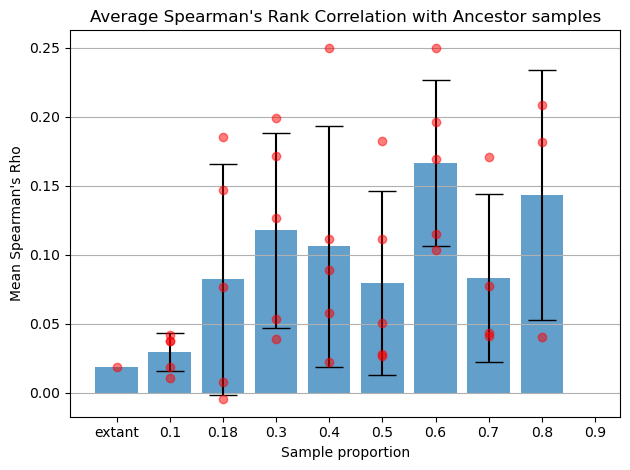